### Libraries

In [1]:
import numpy as np
import pandas as pd
import random
import pickle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import os
from cv2 import xfeatures2d
import time 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, ConfusionMatrixDisplay, precision_score, make_scorer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from pathlib import Path
from keras.preprocessing.image import load_img
import warnings
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import random
import pickle
import matplotlib.pyplot as plt
import cv2
import joblib
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.compat.v1.enable_v2_behavior()
# tf.disable_v2_behavior()
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder
import os
from cv2 import xfeatures2d
import keras
import time 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, ConfusionMatrixDisplay, precision_score, make_scorer
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint   

import time


c:\Users\sofij\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [4]:
import torch
# import jovian
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

from PIL import Image
import glob

In [3]:
# pip install seaborn
# pip install torchvision

In [4]:
# pip install torchvision
# pip install keras
# pip install tensorflow

### Data

In [5]:
def image_to_array(images_folder):
    data = []
    label = []
    for i in range(10):
        for filename in glob.glob(images_folder + "/n{}/*.jpg".format(i)):
            im = Image.open(filename)
            im = im.resize((400,300))
            pixels = np.asarray(im).astype('float32')
            pixels /= 255.0
            data.append(pixels)
            label.append(i)
    data = np.array(data)
    label = np.array(label)
    return data,label

In [25]:
X_train, y_train = image_to_array("./data/monkey/training/training/")

In [22]:
X_test, y_test = image_to_array("./data/monkey/validation/validation/")

In [8]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1096, 300, 400, 3)
Shape of y_train: (1096,)
Shape of X_test: (272, 300, 400, 3)
Shape of y_test: (272,)


In [9]:
cols = ['Label','Latin Name', 'Common Name','Train Images', 'Validation Images']
label_df = pd.read_csv(f"data/monkey/monkey_labels.txt", names=cols, skiprows=1)
labels = label_df['Common Name']
label_df

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [44]:
print("Training set")
num_classes = len(np.unique(y_train))
num_per_class = np.zeros(num_classes)
for i in range(0, num_classes):
    num_per_class[i] = sum(y_train == i)
    print("Class", i, "-", labels[i], ":", int(num_per_class[i]), "images")

print("______________________________________________________")
print("Testing set")
num_classes = len(np.unique(y_test))
num_per_class_test = np.zeros(num_classes)
for i in range(0, num_classes):
    num_per_class_test[i] = sum(y_test == i)
    print("Class", i, "-", labels[i], ":", int(num_per_class_test[i]), "images")


Training set
Class 0 -  mantled_howler                 : 105 images
Class 1 -  patas_monkey                   : 111 images
Class 2 -  bald_uakari                    : 110 images
Class 3 -  japanese_macaque               : 122 images
Class 4 -  pygmy_marmoset                 : 105 images
Class 5 -  white_headed_capuchin          : 113 images
Class 6 -  silvery_marmoset               : 106 images
Class 7 -  common_squirrel_monkey         : 114 images
Class 8 -  black_headed_night_monkey      : 106 images
Class 9 -  nilgiri_langur                 : 104 images
______________________________________________________
Testing set
Class 0 -  mantled_howler                 : 26 images
Class 1 -  patas_monkey                   : 28 images
Class 2 -  bald_uakari                    : 27 images
Class 3 -  japanese_macaque               : 30 images
Class 4 -  pygmy_marmoset                 : 26 images
Class 5 -  white_headed_capuchin          : 28 images
Class 6 -  silvery_marmoset               : 26

### Dataset visualization

In [32]:
def show_image(index):
    # Set the figure size
    plt.figure(figsize=(2, 2))

    # Get the image and label
    image = X_train[index]
    label = y_train[index]

    # Plot the image
    plt.imshow(image)
    plt.title(labels[label])
    plt.axis('off')
    plt.show()

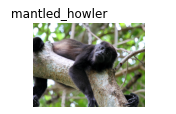

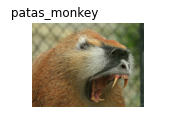

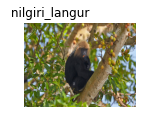

In [33]:
show_image(3)
show_image(200)
show_image(1000)

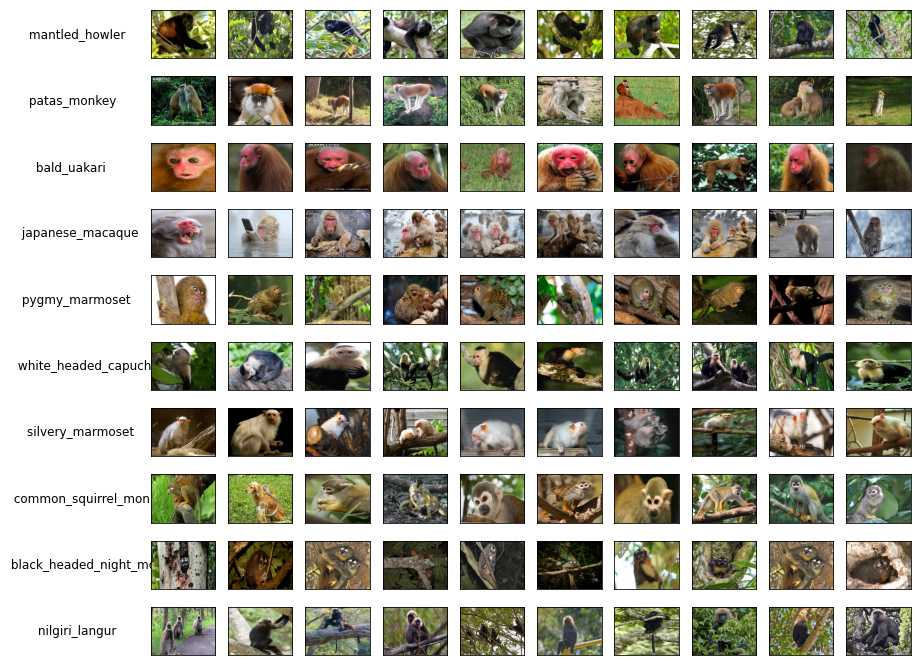

In [70]:
fig, ax = plt.subplots(nrows=num_classes, ncols=11, figsize=(15, 12))

for i in range(0, num_classes):
    indices = np.where(y_train == i)[0]
    indices = indices[:10] # first 10 images belonging to i-th class 
    for j in range(0, 10):
        img = X_train[indices[j], :, :, :]
        ax[i, j+1].imshow(img)
        ax[i, j+1].set_xticks([]); ax[i, j+1].set_yticks([])
        ax[i, j+1].set_xticklabels([]); ax[i, j+1].set_yticklabels([])
    ax[i, 0].text(0.5, 0.5, labels[i], fontsize=12, ha='center', va='center')
    ax[i, 0].set_xticks([]); ax[i, 0].set_yticks([])
    ax[i, 0].set_xticklabels([]); ax[i, 0].set_yticklabels([])

    # remove frame of the plot by setting spines visibility to False
    for spine in ax[i, 0].spines.values():
        spine.set_visible(False)

plt.show()

### "Traditional" feature extraction methods: 1. colour histogram

In [10]:
def calculate_color_histogram(index, num_bins=256):
    img = X_train[index]

    # RGB color space
    r = img[:, :, 0] # first RGB plane corresponds to red color channel -> shape: (300, 400)
    g = img[:, :, 1] # second RGB plane corresponds to green color channel
    b = img[:, :, 2] # third RGB plane corresponds to blue color channel

    # compute the histograms for the all image channel
    hist_r, _ = np.histogram(r, bins=num_bins, range=(0, 1))
    hist_g, _ = np.histogram(g, bins=num_bins, range=(0, 1))
    hist_b, _ = np.histogram(b, bins=num_bins, range=(0, 1))

    # convert histograms to floating-point type before normalization
    hist_r = hist_r.astype(np.float32)
    hist_g = hist_g.astype(np.float32)
    hist_b = hist_b.astype(np.float32)

    hist_r /= hist_r.sum()
    hist_g /= hist_g.sum()
    hist_b /= hist_b.sum()

    return hist_r, hist_g, hist_b

In [11]:
# Plot color histograms and R, G, B channels as grayscale images
def plot_rgb(r_hist, g_hist, b_hist, index):
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

    num_bins = len(r_hist)
    bin_edges = np.linspace(0, 1, num_bins + 1)

    ax[0, 0].imshow(X_train[index]); ax[0, 0].set_xticks([]); ax[0, 0].set_yticks([]); ax[0, 0].set_title('RGB image')
    ax[0, 1].imshow(X_train[index]); ax[0, 1].set_xticks([]); ax[0, 1].set_yticks([]); ax[0, 1].set_title('RGB image')
    ax[0, 2].imshow(X_train[index]); ax[0, 2].set_xticks([]); ax[0, 2].set_yticks([]); ax[0, 2].set_title('RGB image')

    ax[1, 0].plot(bin_edges[:-1], r_hist, 'red'); ax[1, 0].set_xlim([0, 1]); ax[1, 0].set_title('R histogram'); ax[1, 0].set_xlabel('bins'); ax[1, 0].set_ylabel('normalized frequency')
    ax[1, 1].plot(bin_edges[:-1], g_hist, 'green'); ax[1, 1].set_xlim([0, 1]); ax[1, 1].set_title('G histogram'); ax[1, 1].set_xlabel('bins'); ax[1, 1].set_ylabel('normalized frequency')
    ax[1, 2].plot(bin_edges[:-1], b_hist, 'blue'); ax[1, 2].set_xlim([0, 1]); ax[1, 2].set_title('B histogram'); ax[1, 2].set_xlabel('bins'); ax[1, 2].set_ylabel('normalized frequency')

    ax[2, 0].imshow(X_train[index][:, :, 0], cmap='gray'); ax[2, 0].set_xticks([]); ax[2, 0].set_yticks([]); ax[2, 0].set_title('R channel matrix')
    ax[2, 1].imshow(X_train[index][:, :, 1], cmap='gray'); ax[2, 1].set_xticks([]); ax[2, 1].set_yticks([]); ax[2, 1].set_title('G channel matrix')
    ax[2, 2].imshow(X_train[index][:, :, 2], cmap='gray'); ax[2, 2].set_xticks([]); ax[2, 2].set_yticks([]); ax[2, 2].set_title('B channel matrix')

    plt.show()


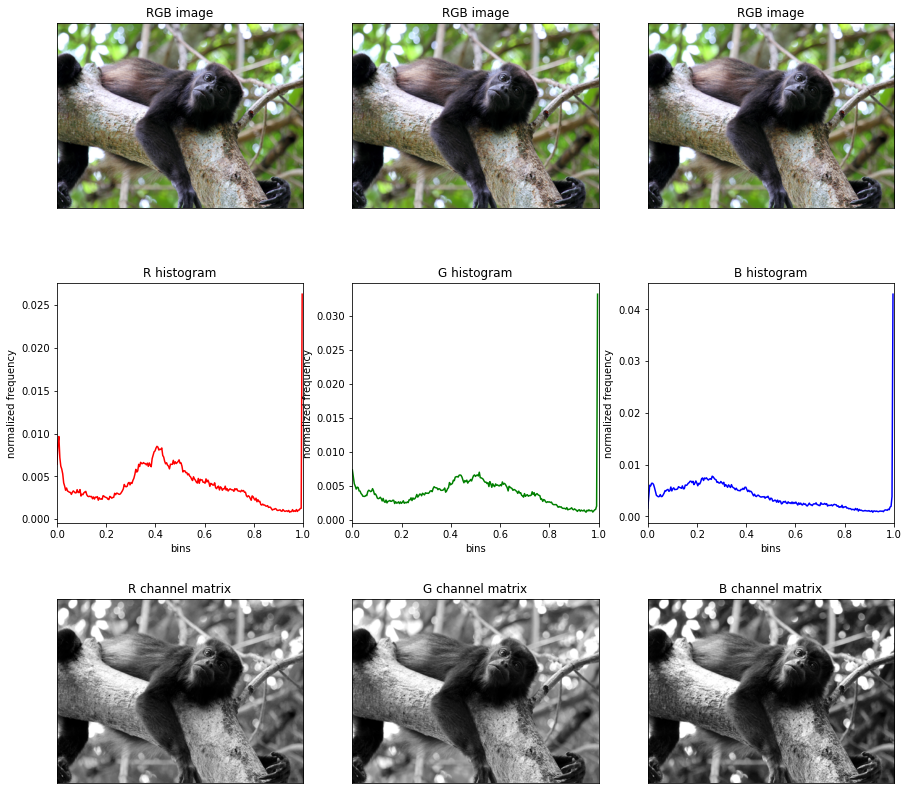

In [58]:
r_hist, g_hist, b_hist = calculate_color_histogram(index=3)
plot_rgb(r_hist, g_hist, b_hist, index=3)

Difference in comparison to other dataset: image values instead of being uint8 - [0, 255] are now float - [0, 1].

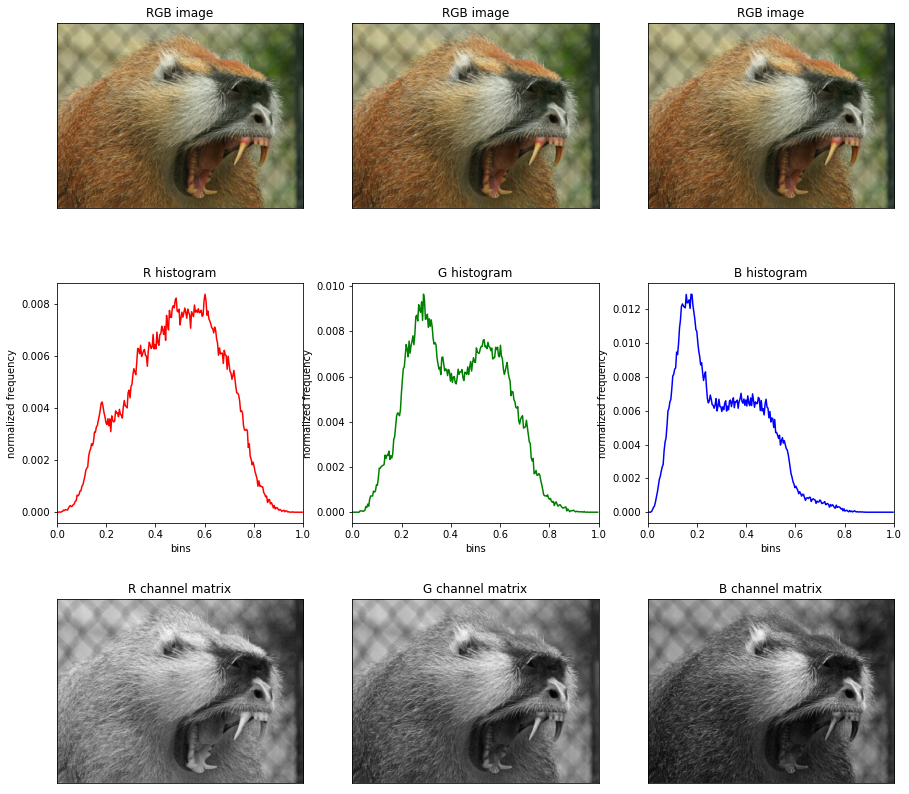

In [59]:
r_hist, g_hist, b_hist = calculate_color_histogram(index=200)
plot_rgb(r_hist, g_hist, b_hist, index=200)

### k-NN classifier 
features: 1. concatenation of R, G, B colour histograms

In [12]:
import time

start_time = time.time()
num_samples = X_train.shape[0]
X_train_feature_vects = np.zeros([num_samples, 3*256])
for i in range(0, num_samples): 
    r_hist, g_hist, b_hist = calculate_color_histogram(index=i)
    X_train_feature_vects[i, :] = np.concatenate((r_hist, g_hist, b_hist))
print("Time needed for feature extraction on the whole training dataset:", time.time() - start_time)

Time needed for feature extraction on the whole training dataset: 5.186892032623291


In [13]:
start_time = time.time()
num_samples = X_test.shape[0]
X_test_feature_vects = np.zeros([num_samples, 3*256])
for i in range(0, num_samples): 
    r_hist, g_hist, b_hist = calculate_color_histogram(index=i)
    X_test_feature_vects[i, :] = np.concatenate((r_hist, g_hist, b_hist))
print("Time needed for feature extraction on the whole testing dataset:", time.time() - start_time)

Time needed for feature extraction on the whole testing dataset: 2.044869899749756


In [132]:
def knn_evaluate(model):
    y_train_pred = model.predict(X_train_feature_vects)
    y_test_pred = model.predict(X_test_feature_vects)

    # accuracy
    print("#"*40)
    print("Accuracy on train: ", accuracy_score(y_true=y_train, y_pred=y_train_pred))
    print("Accuracy on test: ", accuracy_score(y_true=y_test, y_pred=y_test_pred))
    # recall
    print("#"*40)
    print("Recall on train: ", recall_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Recall on test: ", recall_score(y_true=y_test, y_pred=y_test_pred, average = 'macro'))
    # precision
    print("#"*40)
    print("Precision on train: ", precision_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Precision on test: ", precision_score(y_true=y_test, y_pred=y_test_pred, average='macro'))

    # plot confusion matrices
    print("#"*40)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    c_1 = confusion_matrix(y_true=y_train, y_pred=y_train_pred)
    cmd_1 = ConfusionMatrixDisplay(c_1, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    cmd_1.plot(ax=ax[0], cmap=plt.cm.Blues)
    ax[0].set_title("Confusion matrix: train data")

    c_2 = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
    cmd_2 = ConfusionMatrixDisplay(c_2, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    cmd_2.plot(ax=ax[1], cmap=plt.cm.Blues)
    ax[1].set_title("Confusion matrix: test data")

    k = model.n_neighbors
    plt.tight_layout()
    plt.suptitle("k-NN classifier, k = " + str(k), fontsize=15, ha='center')
    plt.subplots_adjust(top=0.85)

    plt.show()

########################################
Accuracy on train:  0.6158759124087592
Accuracy on test:  0.10294117647058823
########################################
Recall on train:  0.6133304397409408
Recall on test:  0.10672568172568173
########################################
Precision on train:  0.6490223257592216
Precision on test:  0.10249240121580547
########################################


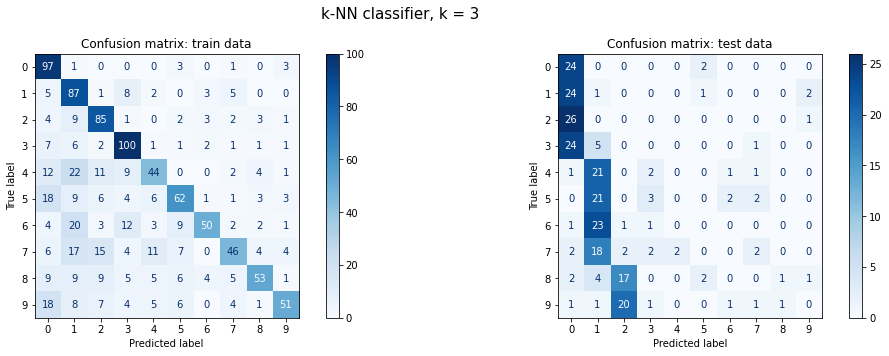

In [72]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_feature_vects, y_train)
knn_evaluate(knn)

########################################
Accuracy on train:  0.46624087591240876
Accuracy on test:  0.09558823529411764
########################################
Recall on train:  0.46161595467378563
Recall on test:  0.09786528286528286
########################################
Precision on train:  0.4796038144709091
Precision on test:  0.10401454350892551
########################################


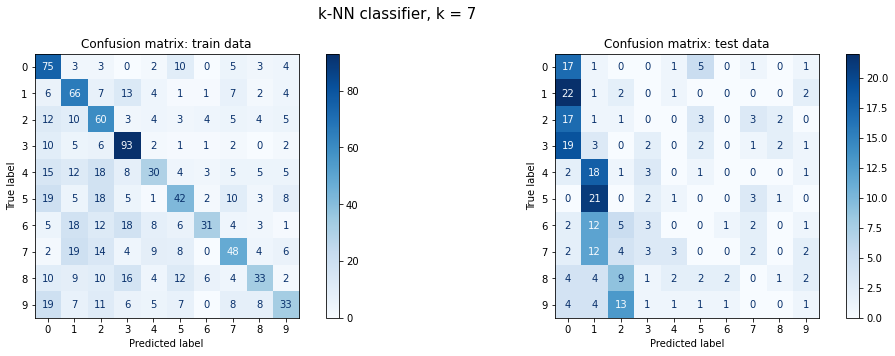

In [75]:
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_feature_vects, y_train)
knn_evaluate(knn)

Too simple features, proper classification and high accuracy score weren't even expected. We are going to try with more complex features (part 2: SIFT, proper determination of parameter k for kNN will also be done there).

### One vs Rest - SVM
features: 1. concatenation of R, G, B colour histograms

In [142]:
def train_svm(X, Y, c):
    start_time = time.time()
    print("Starting training with model SVM...")
    svm_model = OneVsRestClassifier(SVC(kernel='linear', C=c)).fit(X,Y)
    print("Training completed!")
    print ("Time taken in training - {0}".format((time.time() - start_time)))
    return svm_model

In [144]:
def svm_evaluate(model):
    y_train_pred = model.predict(X_train_feature_vects)
    y_test_pred = model.predict(X_test_feature_vects)
    c = model.estimators_[0].C

    # accuracy
    print("#"*40)
    print("Accuracy on train: ", accuracy_score(y_true=y_train, y_pred=y_train_pred))
    print("Accuracy on test: ", accuracy_score(y_true=y_test, y_pred=y_test_pred))
    # recall
    print("#"*40)
    print("Recall on train: ", recall_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Recall on test: ", recall_score(y_true=y_test, y_pred=y_test_pred, average = 'macro'))
    # precision
    print("#"*40)
    print("Precision on train: ", precision_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Precision on test: ", precision_score(y_true=y_test, y_pred=y_test_pred, average='macro'))

    # plot confusion matrices
    print("#"*40)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    c_1 = confusion_matrix(y_true=y_train, y_pred=y_train_pred)
    cmd_1 = ConfusionMatrixDisplay(c_1, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    cmd_1.plot(ax=ax[0], cmap=plt.cm.Blues)
    ax[0].set_title("Confusion matrix: train data")

    c_2 = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
    cmd_2 = ConfusionMatrixDisplay(c_2, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    cmd_2.plot(ax=ax[1], cmap=plt.cm.Blues)
    ax[1].set_title("Confusion matrix: test data")

    plt.tight_layout()
    plt.suptitle("SVM classifier, c = " + str(c), fontsize=15, ha='center')
    plt.subplots_adjust(top=0.85)

    plt.show()

Starting training with model SVM...
Training completed!
Time taken in training - 0.8157460689544678
########################################
Accuracy on train:  0.5155109489051095
Accuracy on test:  0.11764705882352941
########################################
Recall on train:  0.5113922466388412
Recall on test:  0.11974765974765975
########################################
Precision on train:  0.5263524159186455
Precision on test:  0.11301075268817204
########################################


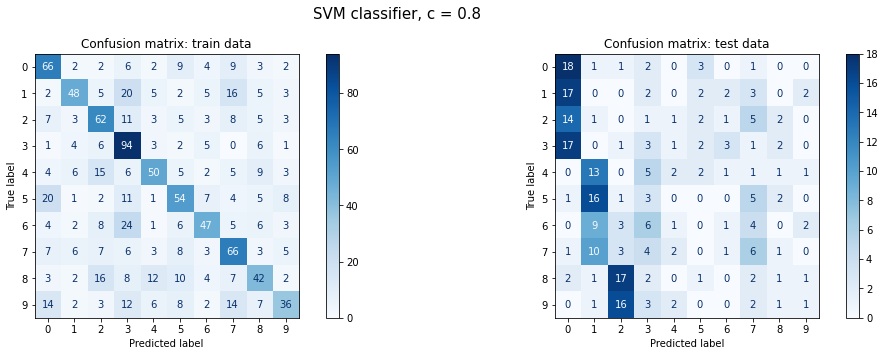

In [145]:
c = 0.8
svm_model = train_svm(X_train_feature_vects, y_train, c)
svm_evaluate(svm_model)
# 3.5s

### Multi Layer Perceptron (MLP) using Keras Sequential Model
features: 1. concatenation of R, G, B colour histograms

##### Preparing the data

In [41]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# histograms already normalized
x_train_s = X_train_feature_vects
x_test_s = X_test_feature_vects

# break training set into training and validation sets
(x_train_s, x_valid_s) = x_train_s[80:], x_train_s[:80]
(y_train_s, y_valid_s) = y_train[80:], y_train[:80]

# print number of training, validation, and test samples
print(x_train_s.shape[0], 'train samples')
print(x_test_s.shape[0], 'test samples')
print(x_valid_s.shape[0], 'validation samples')

# check the shape
print('shape of x_train_s:', x_train_s.shape) # 3*256=768

1016 train samples
272 test samples
80 validation samples
shape of x_train_s: (1016, 768)


##### Building and training the MLP

In [42]:
# model architecture
model = Sequential()
model.add(Flatten(input_shape = x_train_s.shape[1:]))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 768)               0         
                                                                 
 dense_13 (Dense)            (None, 500)               384500    
                                                                 
 dropout_10 (Dropout)        (None, 500)               0         
                                                                 
 dense_14 (Dense)            (None, 500)               250500    
                                                                 
 dropout_11 (Dropout)        (None, 500)               0         
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dropout_12 (Dropout)        (None, 200)              

In [43]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
mlp_start = time.time() # for stopwatch

checkpointer = ModelCheckpoint(filepath='MLP.best_weights.hdf5', verbose=1, save_best_only=True)
hist = model.fit(x_train_s, y_train_s, batch_size=32, epochs=50,
          validation_data=(x_valid_s, y_valid_s), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

mlp_end = time.time()
mlp_took = mlp_end - mlp_start
print("took %s seconds"%(mlp_took))

Epoch 1/50

Epoch 1: val_loss improved from inf to 2.92968, saving model to MLP.best_weights.hdf5
32/32 - 2s - loss: 2.2920 - accuracy: 0.0915 - val_loss: 2.9297 - val_accuracy: 0.0000e+00 - 2s/epoch - 52ms/step
Epoch 2/50

Epoch 2: val_loss improved from 2.92968 to 2.73755, saving model to MLP.best_weights.hdf5
32/32 - 1s - loss: 2.2576 - accuracy: 0.1152 - val_loss: 2.7376 - val_accuracy: 0.0000e+00 - 640ms/epoch - 20ms/step
Epoch 3/50

Epoch 3: val_loss did not improve from 2.73755
32/32 - 1s - loss: 2.2078 - accuracy: 0.1870 - val_loss: 3.2768 - val_accuracy: 0.0000e+00 - 593ms/epoch - 19ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 2.73755
32/32 - 1s - loss: 2.1649 - accuracy: 0.1900 - val_loss: 3.6090 - val_accuracy: 0.0000e+00 - 585ms/epoch - 18ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 2.73755
32/32 - 1s - loss: 2.1299 - accuracy: 0.1949 - val_loss: 2.7861 - val_accuracy: 0.0000e+00 - 582ms/epoch - 18ms/step
Epoch 6/50

Epoch 6: val_loss did not imp

In [19]:
def evaluate_mlp(y_train_pred, y_test_pred, y_train=y_train[80:]):
    # accuracy
    print("#"*40)
    print("Accuracy on train: ", accuracy_score(y_true=y_train, y_pred=y_train_pred))
    print("Accuracy on test: ", accuracy_score(y_true=y_test, y_pred=y_test_pred))
    # recall
    print("#"*40)
    print("Recall on train: ", recall_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Recall on test: ", recall_score(y_true=y_test, y_pred=y_test_pred, average = 'macro'))
    # precision
    print("#"*40)
    print("Precision on train: ", precision_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Precision on test: ", precision_score(y_true=y_test, y_pred=y_test_pred, average='macro'))

    # plot confusion matrices
    print("#"*40)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    c_1 = confusion_matrix(y_true=y_train, y_pred=y_train_pred)
    cmd_1 = ConfusionMatrixDisplay(c_1, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    cmd_1.plot(ax=ax[0], cmap=plt.cm.Blues)
    ax[0].set_title("Confusion matrix: train data")

    c_2 = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
    cmd_2 = ConfusionMatrixDisplay(c_2, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    cmd_2.plot(ax=ax[1], cmap=plt.cm.Blues)
    ax[1].set_title("Confusion matrix: test data")

    plt.tight_layout()
    plt.suptitle("MLP classifier", fontsize=15, ha='center')
    plt.subplots_adjust(top=0.85)

    plt.show()

32/32 [==============================] - 0s 4ms/step
########################################
Accuracy on train:  0.6377952755905512
Accuracy on test:  0.07720588235294118
########################################
Recall on train:  0.6278292905396221
Recall on test:  0.07827635327635327
########################################
Precision on train:  0.6707061286478099
Precision on test:  0.10781689744455702
########################################


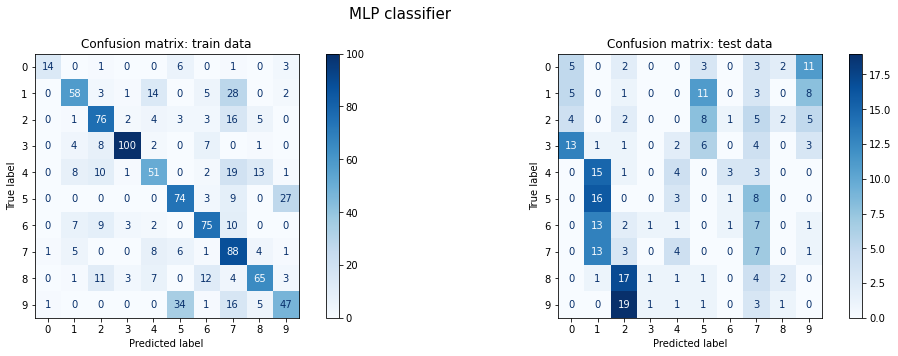

In [45]:
# predict and evaluate
y_test_pred_mlp = model.predict(x_test_s)
y_test_pred_mlp = np.argmax(y_test_pred_mlp, axis=1)
y_test = np.argmax(y_test, axis=1)

y_train_pred_mlp = model.predict(x_train_s)
y_train_pred_mlp = np.argmax (y_train_pred_mlp, axis=1)
y_train = np.argmax(y_train, axis=1)

evaluate_mlp(y_train_pred_mlp, y_test_pred_mlp)

Overfitting is definitelly present, however less complicated networks didn't deliver descent accuracy even on training set and ahe accuracy on test is significantly lower in comparison with accuracy on validation.

### "Traditional" feature extraction methods: 1. colour histogram HSV

In [119]:
def calculate_histogram_hsv(index, num_bins=256):
    img = X_train[index]
    # input image: float values [0, 1]

    # convert RGB image to HSV color space
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # HSV color space
    h = img_hsv[:, :, 0] / 179.0 # hue channel, shape: (300, 400)
    # hue value is [0, 179] but we want same scales for all the values
    s = img_hsv[:, :, 1]  # saturation channel
    v = img_hsv[:, :, 2]  # value channel (corresponds to the light amount)
    
    # compute the histograms for all image channels
    hist_h, _ = np.histogram(h, bins=num_bins, range=(0, 1))  
    hist_s, _ = np.histogram(s, bins=num_bins, range=(0, 1))
    hist_v, _ = np.histogram(v, bins=num_bins, range=(0, 1))

    # convert histograms to floating-point type before normalization
    hist_h = hist_h.astype(np.float32)
    hist_s = hist_s.astype(np.float32)
    hist_v = hist_v.astype(np.float32)

    hist_h /= hist_h.sum()
    hist_s /= hist_s.sum()
    hist_v /= hist_v.sum()
    
    # return h, s, v
    return hist_h, hist_s, hist_v

In [123]:
def plot_hsv(h_hist, s_hist, v_hist, index):
    img = X_train[index]
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    num_bins = len(r_hist)
    bin_edges = np.linspace(0, 1, num_bins + 1)
    
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

    ax[0, 0].imshow(img); ax[0, 0].set_xticks([]); ax[0, 0].set_yticks([]); ax[0, 0].set_title('RGB image')
    ax[0, 1].imshow(img); ax[0, 1].set_xticks([]); ax[0, 1].set_yticks([]); ax[0, 1].set_title('RGB image')
    ax[0, 2].imshow(img); ax[0, 2].set_xticks([]); ax[0, 2].set_yticks([]); ax[0, 2].set_title('RGB image')

    ax[1, 0].plot(bin_edges[:-1], h_hist, 'darkblue'); ax[1, 0].set_xlim([0, 1]); ax[1, 0].set_title('H histogram'); ax[1, 0].set_xlabel('bins'); ax[1, 0].set_ylabel('normalized frequency')
    ax[1, 1].plot(bin_edges[:-1], s_hist, 'darkblue'); ax[1, 1].set_xlim([0, 1]); ax[1, 1].set_title('S histogram'); ax[1, 1].set_xlabel('bins'); ax[1, 1].set_ylabel('normalized frequency')
    ax[1, 2].plot(bin_edges[:-1], v_hist, 'darkblue'); ax[1, 2].set_xlim([0, 1]); ax[1, 2].set_title('V histogram'); ax[1, 2].set_xlabel('bins'); ax[1, 2].set_ylabel('normalized frequency')

    ax[2, 0].imshow(img_hsv[:, :, 0], cmap='jet'); ax[2, 0].set_xticks([]); ax[2, 0].set_yticks([]); ax[2, 0].set_title('H channel matrix')
    ax[2, 1].imshow(img_hsv[:, :, 1], cmap='jet'); ax[2, 1].set_xticks([]); ax[2, 1].set_yticks([]); ax[2, 1].set_title('S channel matrix')
    ax[2, 2].imshow(img_hsv[:, :, 2], cmap='gray'); ax[2, 2].set_xticks([]); ax[2, 2].set_yticks([]); ax[2, 2].set_title('V channel matrix')

    plt.show()

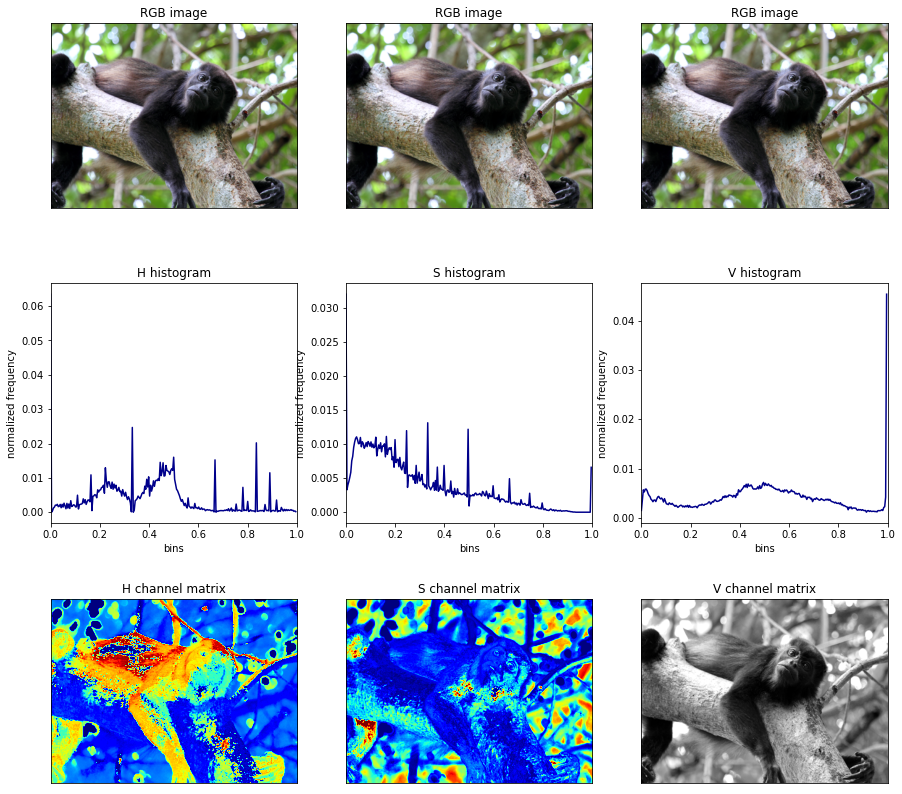

In [124]:
h_hist, s_hist, v_hist = calculate_histogram_hsv(index=3)
plot_hsv(h_hist, s_hist, v_hist, index=3)

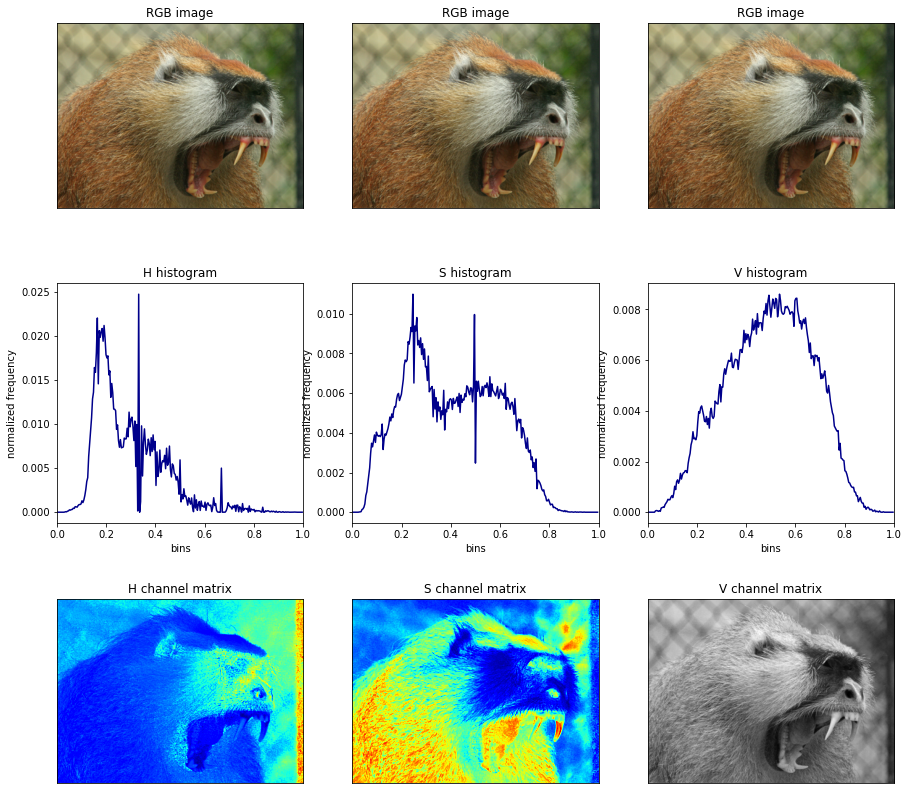

In [125]:
h_hist, s_hist, v_hist = calculate_histogram_hsv(index=200)
plot_hsv(h_hist, s_hist, v_hist, index=200)

### k-NN classifier 
features: 1. concatenation of H, S, V colour histograms

In [126]:
start_time = time.time()
num_samples = X_train.shape[0]
X_train_feature_vects = np.zeros([num_samples, 3*256])
for i in range(0, num_samples): 
    h_hist, s_hist, v_hist = calculate_histogram_hsv(index=i)
    X_train_feature_vects[i, :] = np.concatenate((h_hist, s_hist, v_hist))
print("Time needed for feature extraction on the whole training dataset:", time.time() - start_time)

Time needed for feature extraction on the whole training dataset: 3.8736276626586914


In [127]:
start_time = time.time()
num_samples = X_test.shape[0]
X_test_feature_vects = np.zeros([num_samples, 3*256])
for i in range(0, num_samples): 
    h_hist, s_hist, v_hist = calculate_histogram_hsv(index=i)
    X_test_feature_vects[i, :] = np.concatenate((h_hist, s_hist, v_hist))
print("Time needed for feature extraction on the whole testing dataset:", time.time() - start_time)

Time needed for feature extraction on the whole testing dataset: 0.9997913837432861


########################################
Accuracy on train:  0.6414233576642335
Accuracy on test:  0.10661764705882353
########################################
Recall on train:  0.6398217068941092
Recall on test:  0.11033374033374033
########################################
Precision on train:  0.6714969532810422
Precision on test:  0.08365800865800865
########################################


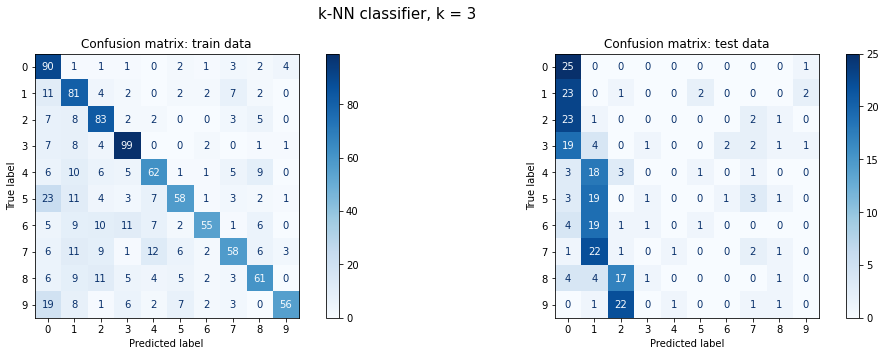

In [128]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_feature_vects, y_train)
knn_evaluate(knn)

### "Traditional" feature extraction methods: 2. Scale Invariant Feature Transform - SIFT

https://github.com/deepanshut041/feature-detection/blob/master/sift/sift.ipynb


SIFT is an algorithm that identifies keypoints and computes their corresponding descriptors. Keypoints represent points of interest in an image, and descriptors capture the local features by extracting small, fixed-size (128) patches (converted into vectors) around each keypoint, describing the surrounding area.

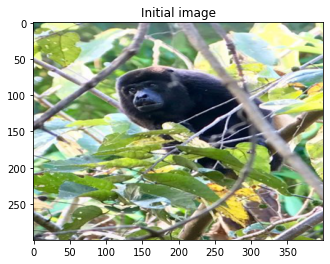

Number of Keypoints Detected In The Training Image:  1612


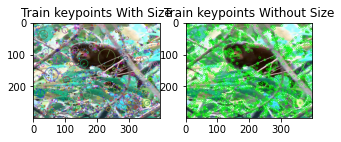

In [146]:
def sift(index):
    plt.imshow(X_train[index])
    plt.title("Initial image")
    plt.show()
    training_image  = X_train[index]
    

    # had to add this as detectAndCompute ONLY ACCEPTS IMAGES W/ 8 BIT integer values
    training_image = cv2.normalize(training_image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    #  converting image to RGB
    training_image = cv2.cvtColor(training_image, cv2.COLOR_BGR2RGB)
    # converting to gray scale
    training_image_gray = cv2.cvtColor(training_image,cv2.COLOR_RGB2GRAY)

    # detecting keypoints
    sift = cv2.SIFT_create()
    train_keypoints, train_descriptor = sift.detectAndCompute(training_image_gray, None)
    keypoints_without_size = np.copy(training_image)
    keypoints_with_size = np.copy(training_image)

    cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))
    cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display image with and without keypoints size
    fx, plots = plt.subplots(1, 2, figsize=(5,5))

    plots[0].set_title("Train keypoints With Size")
    plots[0].imshow(keypoints_with_size, cmap='gray')

    plots[1].set_title("Train keypoints Without Size")
    plots[1].imshow(keypoints_without_size, cmap='gray')

    # Print the number of keypoints detected in the training image
    print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))
    # print(train_keypoints)
    # print(train_descriptor)
    # print(train_descriptor.shape)

sift(2)

In [149]:
from sklearn.cluster import KMeans
import time

def generate_vocabulary(n_images, no_clusters):

    # list_of_all_descriptors: list of numpy arrays such that each element of the list - 2D numpy array 
    # corresponds to descriptors of the one training image
    # descriptor matrix of one image: (#keypoints x 128)

    print("SIFT feature extraction begins...")
    start_time = time.time()
    X_train_subset = X_train[:n_images]
    sift = cv2.SIFT()
    list_of_all_descriptors = []

    for i in range(0, n_images):
        img = X_train_subset[i]
        img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converting image to RGB (not necessary since it's already in RGB)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # converting to gray scale

        # detecting keypoints
        sift = cv2.SIFT_create()
        train_keypoints, train_descriptor = sift.detectAndCompute(img, None)
        list_of_all_descriptors.append(train_descriptor)  

    print("Time taken for SIFT feature extraction:", time.time() - start_time)

    # converting into 2D numpy array (vertical stacking of the list elements): mat_of_all_descriptors

    print ("Stacking begins...")
    mat_of_all_descriptors = np.array(list_of_all_descriptors[0])
    for remaining in list_of_all_descriptors[1:]:
        if remaining is not None:                 
            # it can happen that SIFT detector doesn't detect any keypoints -> exclude empty lists
            mat_of_all_descriptors = np.vstack((mat_of_all_descriptors, remaining))
    print ("Stacking done")

    # perform clustering: K-means algorithm

    start_time = time.time()
    print("Starting with clustering...")
    kmeans_obj = KMeans(no_clusters)
    kmeans_ret = kmeans_obj.fit_predict(mat_of_all_descriptors) # fitting the model: class label assigned to each descriptor
    # centroids = kmeans_obj.cluster_centers_
    print("Clustering completed!")
    print("Time taken for clustering:", time.time() - start_time)

    return list_of_all_descriptors, kmeans_obj

In [150]:
def histogram_creation(descriptor_list, kmeans_obj):

    n_images = len(descriptor_list)
    kmeans_ret = kmeans_obj.labels_
    no_clusters = len(kmeans_obj.cluster_centers_)


    mega_histogram = np.array([np.zeros(no_clusters) for _ in range(n_images)])  # #n_images x #no_clusters
    old_count = 0
    for i in range(n_images):
        if descriptor_list[i] is None:
            continue 
        l = len(descriptor_list[i])
        for j in range(l):
            idx = kmeans_ret[old_count+j]
            mega_histogram[i][idx] += 1
        old_count += l
    print ("Vocabulary Histogram Generated")

    return mega_histogram

In [151]:
list_of_all_descriptors, kmeans_obj = generate_vocabulary(n_images=100, no_clusters=15)

SIFT feature extraction begins...
Time taken for SIFT feature extraction: 3.9487991333007812
Stacking begins...
Stacking done
Starting with clustering...


c:\Users\sofij\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clustering completed!
Time taken for clustering: 42.31303358078003


In [152]:
mega_histogram = histogram_creation(descriptor_list=list_of_all_descriptors, kmeans_obj=kmeans_obj)

Vocabulary Histogram Generated


### Histogram: results inspection

In [160]:
n_images = len(X_train) # whole dataset
no_clusters = 10
list_of_all_descriptors, kmeans_obj = generate_vocabulary(n_images=n_images, no_clusters=no_clusters)
mega_histogram = histogram_creation(descriptor_list=list_of_all_descriptors, kmeans_obj=kmeans_obj)

SIFT feature extraction begins...
Time taken for SIFT feature extraction: 42.76785683631897
Stacking begins...
Stacking done
Starting with clustering...


c:\Users\sofij\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clustering completed!
Time taken for clustering: 198.91587042808533
Vocabulary Histogram Generated


In [161]:
def plot_bowv_histogram(axis, img_idx):
    class_label = y_train[img_idx]
    x_labels = np.arange(0, no_clusters)
    data = mega_histogram[img_idx, :]

    axis.bar(x_labels, data)
    axis.set_xlabel("visual word index")
    axis.set_ylabel("frequency")
    axis.set_title(f"Histogram of image: {img_idx}, class label: {class_label}")

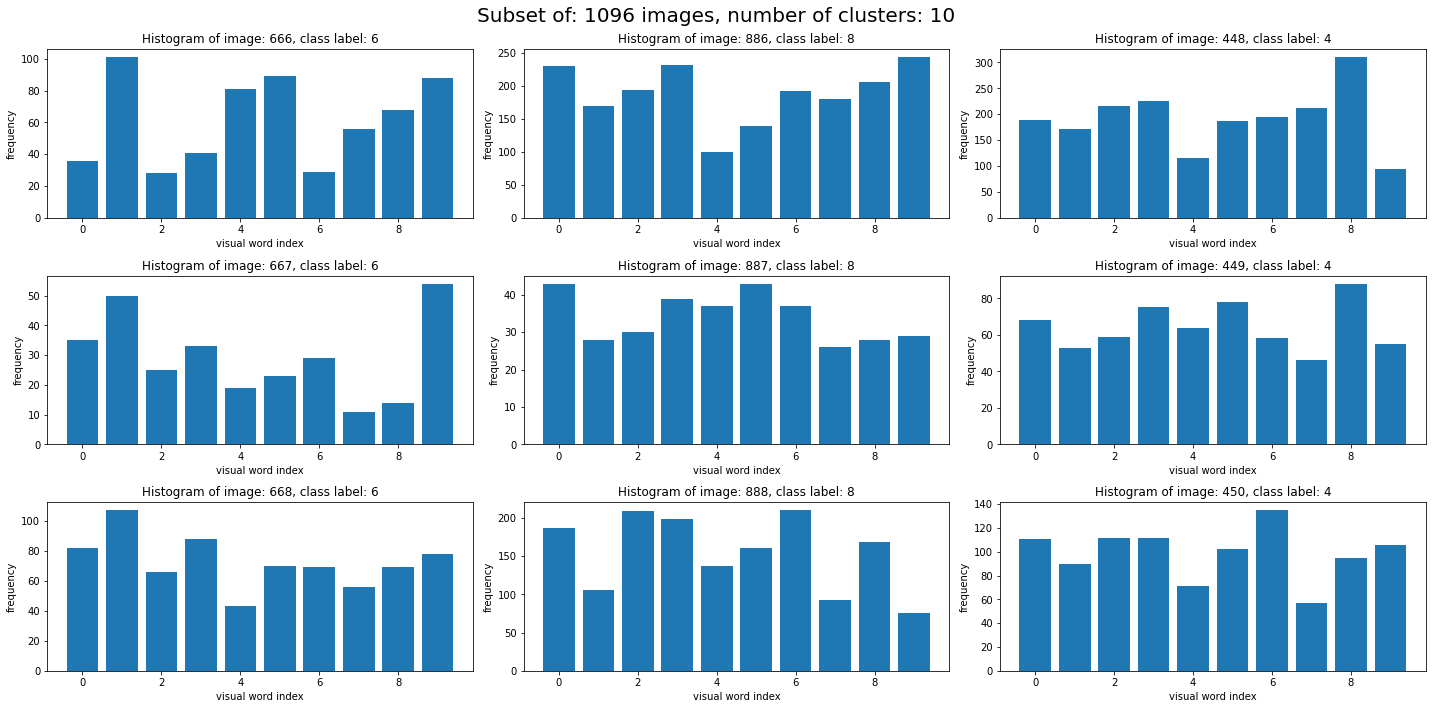

In [162]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

indices_6 = np.where(y_train == 6)[0][:3]  # first 3 images belonging to class 6
for i, img_idx in enumerate(indices_6):
    plot_bowv_histogram(ax[i, 0], img_idx)

indices_8 = np.where(y_train == 8)[0][:3]  # first 3 images belonging to class 8
for i, img_idx in enumerate(indices_8):
    plot_bowv_histogram(ax[i, 1], img_idx)

indices_4 = np.where(y_train == 4)[0][:3]  # first 3 images belonging to class 4
for i, img_idx in enumerate(indices_4):
    plot_bowv_histogram(ax[i, 2], img_idx)

plt.suptitle(f"Subset of: {n_images} images, number of clusters: {no_clusters}", fontsize=20)

plt.tight_layout()
plt.show()

Histograms of the images belonging to the same class don't have the same histograms, but they seem to be a bit more similar than in previous dataset, which gives hope that higher quality classification will be performed.

### KNN Train and Test

In [114]:
def train_knn(X, y, k):
    start_time = time.time()
    print("Starting with training of KNN model...")
    knn_model = KNeighborsClassifier(k)
    knn_model.fit(X, y)
    print("Training completed!")
    print ("Time taken in training {0}".format((time.time() - start_time)))
    return knn_model

In [124]:
def recognize(model, kmeans_obj, test_img):
    sift = cv2.SIFT_create()
    test_img = cv2.normalize(test_img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

    img_keypoints, img_desc = sift.detectAndCompute(test_img, None)
    
    no_clusters = kmeans_obj.n_clusters
    vocab = np.array( [[ 0 for i in range(no_clusters)]])
    if img_desc is not None:
        test_ret = kmeans_obj.predict(img_desc)
        for each in test_ret:
            vocab[0][each] +=1
        lb = model.predict(vocab)
        return lb
    else:
        lb = np.array([-1000])
        return lb

def test_model(model, kmeans_obj, x_test):
    predictions = []
    start_time = time.time()
    print ("Testing started ..")
    for image in x_test:
        cl = recognize(model, kmeans_obj, image)
        predictions.append(cl)
    print ("Testing completed")
    print ("Time taken in testing - {0}".format((time.time() - start_time)))
    return np.array(predictions)

def test_model_train_set(model, mega_histogram): 
    # there is no need to test the training set in the same way as test (mega_histogram is saved)
    start_time = time.time()
    print ("Testing started ..")
    predictions = model.predict(mega_histogram)
    print ("Testing completed")
    print ("Time taken in testing - {0}".format((time.time() - start_time)))
    return np.array(predictions)

In [126]:
def evaluate_model(y_train_pred, y_test_pred, k):
    # accuracy
    print("#"*40)
    print("Accuracy on train: ", accuracy_score(y_true=y_train, y_pred=y_train_pred))
    print("Accuracy on test: ", accuracy_score(y_true=y_test, y_pred=y_test_pred))
    # recall
    print("#"*40)
    print("Recall on train: ", recall_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Recall on test: ", recall_score(y_true=y_test, y_pred=y_test_pred, average = 'macro'))
    # precision
    print("#"*40)
    print("Precision on train: ", precision_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Precision on test: ", precision_score(y_true=y_test, y_pred=y_test_pred, average='macro'))

    # plot confusion matrices
    print("#"*40)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    c_1 = confusion_matrix(y_true=y_train, y_pred=y_train_pred)
    if (len(np.unique(y_train_pred))==10):
        cmd_1 = ConfusionMatrixDisplay(c_1, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    else:
        cmd_1 = ConfusionMatrixDisplay(c_1, display_labels=['not classified', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    cmd_1.plot(ax=ax[0], cmap=plt.cm.Blues)
    ax[0].set_title("Confusion matrix: train data")

    c_2 = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
    if (len(np.unique(y_test_pred))==10):
        cmd_2 = ConfusionMatrixDisplay(c_2, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    else:
        cmd_2 = ConfusionMatrixDisplay(c_2, display_labels=['not classified', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    cmd_2.plot(ax=ax[1], cmap=plt.cm.Blues)
    ax[1].set_title("Confusion matrix: test data")
    
    plt.tight_layout()
    plt.suptitle("k-NN classifier, k = " + str(k), fontsize=15, ha='center')
    plt.subplots_adjust(top=0.85)

    plt.show()

### no_clusters = 10

In [120]:
list_of_all_descriptors, kmeans_obj = generate_vocabulary(n_images=X_train.shape[0], no_clusters=10)
mega_histogram = histogram_creation(descriptor_list=list_of_all_descriptors, kmeans_obj=kmeans_obj)
# 10 mins

SIFT feature extraction begins...
Time taken for SIFT feature extraction: 43.01327109336853
Stacking begins...
Stacking done
Starting with clustering...
Clustering completed!
Time taken for clustering: 367.3715331554413
Vocabulary Histogram Generated


In [121]:
# save the current model
with open('mega_histogram_train_10_monkey.txt', 'wb') as f:
    np.save(f, mega_histogram)
joblib.dump(kmeans_obj, 'kmeans_model_10_monkey.pkl')


with open('mega_histogram_train_10_monkey.txt', 'rb') as f:
    mega_histogram = np.load(f)
kmeans_obj = joblib.load('kmeans_model_10_monkey.pkl')
no_clusters = kmeans_obj.n_clusters

Starting with training of KNN model...
Training completed!
Time taken in training 0.003665924072265625
Testing started ..
Testing completed
Time taken in testing - 13.45230484008789
Testing started ..
Testing completed
Time taken in testing - 0.25376224517822266
########################################
Accuracy on train:  0.6021897810218978
Accuracy on test:  0.29411764705882354
########################################
Recall on train:  0.6030897928564412
Recall on test:  0.2945909645909646
########################################
Precision on train:  0.6421426431995424
Precision on test:  0.33416931169336184
########################################


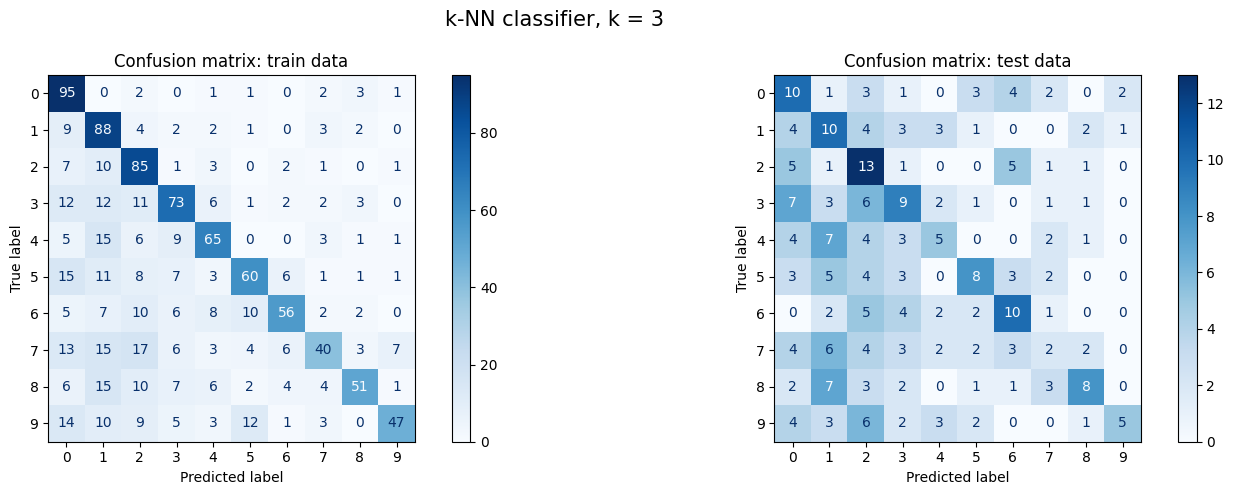

In [127]:
k = 3
knn_model = train_knn(mega_histogram, y_train, k)
y_test_pred = test_model(knn_model, kmeans_obj, X_test)
y_train_pred = test_model_train_set(knn_model, mega_histogram)
evaluate_model(y_train_pred, y_test_pred, k)

In [128]:
k_vect = np.array([3, 5, 7, 11, 15, 17])
acc_train_vect = np.zeros(len(k_vect))
acc_test_vect = np.zeros(len(k_vect))
for i in range(0, len(k_vect)):
    k = k_vect[i]
    print("k=", k)
    knn_model = train_knn(mega_histogram, y_train, k)
    y_test_pred = test_model(knn_model, kmeans_obj, X_test)
    y_train_pred = test_model_train_set(knn_model, mega_histogram)
    acc_train_vect[i] = accuracy_score(y_true=y_train, y_pred=y_train_pred)
    acc_test_vect[i] = accuracy_score(y_true=y_test, y_pred=y_test_pred)

k= 3
Starting with training of KNN model...
Training completed!
Time taken in training 0.002017974853515625
Testing started ..
Testing completed
Time taken in testing - 9.954247236251831
Testing started ..
Testing completed
Time taken in testing - 0.11892199516296387
k= 5
Starting with training of KNN model...
Training completed!
Time taken in training 0.0012700557708740234
Testing started ..
Testing completed
Time taken in testing - 11.447356939315796
Testing started ..
Testing completed
Time taken in testing - 0.14307475090026855
k= 7
Starting with training of KNN model...
Training completed!
Time taken in training 0.0015418529510498047
Testing started ..
Testing completed
Time taken in testing - 12.3300621509552
Testing started ..
Testing completed
Time taken in testing - 0.1574268341064453
k= 11
Starting with training of KNN model...
Training completed!
Time taken in training 0.0016047954559326172
Testing started ..
Testing completed
Time taken in testing - 11.413044214248657
Testi

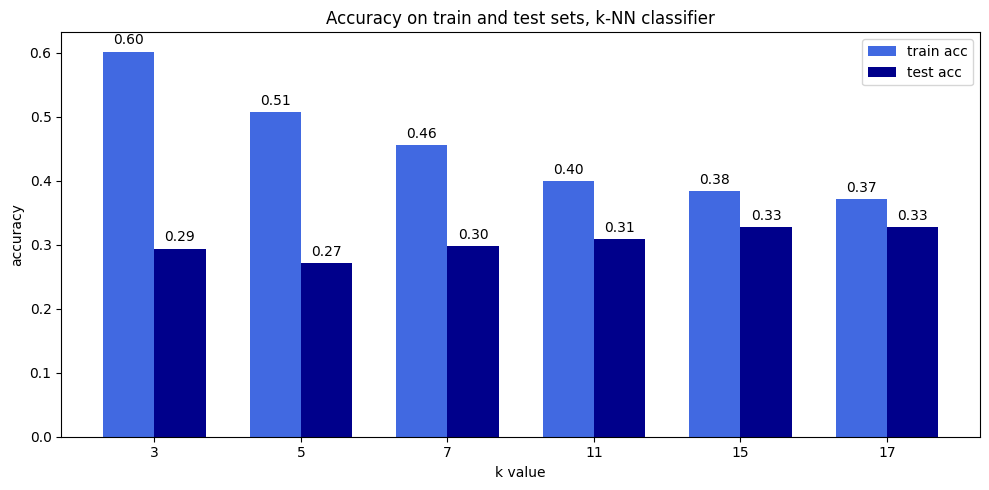

In [129]:
bar_width = 0.35
x_pos = range(len(k_vect))

fig, ax = plt.subplots(figsize=(10, 5))

train_bars = ax.bar(x_pos, acc_train_vect, width=bar_width, label='train acc', color='royalblue')
test_bars = ax.bar([pos + bar_width for pos in x_pos], acc_test_vect, width=bar_width, label='test acc', color='darkblue')

ax.set_xticks([pos + bar_width / 2 for pos in x_pos])
ax.set_xticklabels(k_vect)

ax.set_xlabel('k value')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy on train and test sets, k-NN classifier')
ax.legend()

# function to add text labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

# add labels on top of the bars
add_labels(train_bars)
add_labels(test_bars)

plt.tight_layout()
plt.show()

### One vs Rest - SVM

In [130]:
def train_svm(X,Y, c):
    start_time = time.time()
    print("Starting training with model SVM...")
    svm_model = OneVsRestClassifier(SVC(kernel = 'linear',C = c)).fit(X,Y)
    print("Training completed!")
    print ("Time taken in training - {0}".format((time.time() - start_time)))
    return svm_model

def evaluate_model_svm(y_train_pred, y_test_pred, c):
    # accuracy
    print("#"*40)
    print("Accuracy on train: ", accuracy_score(y_true=y_train, y_pred=y_train_pred))
    print("Accuracy on test: ", accuracy_score(y_true=y_test, y_pred=y_test_pred))
    # recall
    print("#"*40)
    print("Recall on train: ", recall_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Recall on test: ", recall_score(y_true=y_test, y_pred=y_test_pred, average = 'macro'))
    # precision
    print("#"*40)
    print("Precision on train: ", precision_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Precision on test: ", precision_score(y_true=y_test, y_pred=y_test_pred, average='macro'))

    # plot confusion matrices
    print("#"*40)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    c_1 = confusion_matrix(y_true=y_train, y_pred=y_train_pred)
    if (len(np.unique(y_train_pred))==10):
        cmd_1 = ConfusionMatrixDisplay(c_1, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    else:
        cmd_1 = ConfusionMatrixDisplay(c_1, display_labels=['not classified', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    cmd_1.plot(ax=ax[0], cmap=plt.cm.Blues)
    ax[0].set_title("Confusion matrix: train data")

    c_2 = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
    if (len(np.unique(y_test_pred))==10):
        cmd_2 = ConfusionMatrixDisplay(c_2, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    else:
        cmd_2 = ConfusionMatrixDisplay(c_2, display_labels=['not classified', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    cmd_2.plot(ax=ax[1], cmap=plt.cm.Blues)
    ax[1].set_title("Confusion matrix: test data")
    
    plt.tight_layout()
    plt.suptitle("SVM Classifier, c = " + str(c), fontsize=15, ha='center')
    plt.subplots_adjust(top=0.85)

    plt.show()

Starting training with model SVM...
Training completed!
Time taken in training - 40.444831132888794
Testing started ..
Testing completed
Time taken in testing - 18.96231698989868
Testing started ..
Testing completed
Time taken in testing - 0.21777105331420898
########################################
Accuracy on train:  0.14963503649635038
Accuracy on test:  0.15441176470588236
########################################
Recall on train:  0.1507004291535729
Recall on test:  0.15608669108669107
########################################
Precision on train:  0.17611743351262857
Precision on test:  0.19948719257899034
########################################


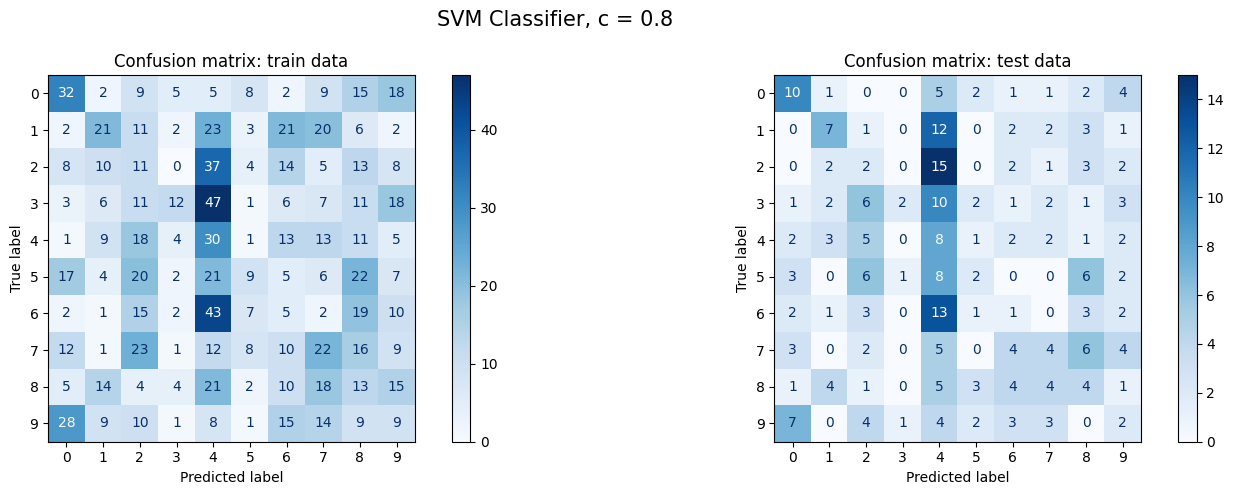

In [131]:
c = 0.8
svm_model = train_svm(mega_histogram, y_train, c)
y_test_pred = test_model(svm_model, kmeans_obj, X_test)
y_train_pred = test_model_train_set(svm_model, mega_histogram)
evaluate_model_svm(y_train_pred, y_test_pred,0.8 )
#1min

In [132]:
c_vect = np.array([0.2,0.5,0.8,1])
acc_train_vect_svm = np.zeros(len(c_vect))
acc_test_vect_svm = np.zeros(len(c_vect))
for i in range(0, len(c_vect)):
    c = c_vect[i]
    print("c=", c)
    svm_model = train_svm(mega_histogram, y_train, c)
    y_test_pred = test_model(svm_model, kmeans_obj, X_test)
    y_train_pred = test_model_train_set(svm_model, mega_histogram)
    acc_train_vect_svm[i] = accuracy_score(y_true=y_train, y_pred=y_train_pred)
    acc_test_vect_svm[i] = accuracy_score(y_true=y_test, y_pred=y_test_pred)

# 2

c= 0.2
Starting training with model SVM...
Training completed!
Time taken in training - 7.853941917419434
Testing started ..
Testing completed
Time taken in testing - 13.460722208023071
Testing started ..
Testing completed
Time taken in testing - 0.16443109512329102
c= 0.5
Starting training with model SVM...
Training completed!
Time taken in training - 20.145243883132935
Testing started ..
Testing completed
Time taken in testing - 14.489691019058228
Testing started ..
Testing completed
Time taken in testing - 0.20278501510620117
c= 0.8
Starting training with model SVM...
Training completed!
Time taken in training - 32.69539403915405
Testing started ..
Testing completed
Time taken in testing - 27.79690194129944
Testing started ..
Testing completed
Time taken in testing - 0.31235313415527344
c= 1.0
Starting training with model SVM...
Training completed!
Time taken in training - 52.80723309516907
Testing started ..
Testing completed
Time taken in testing - 27.8140971660614
Testing started

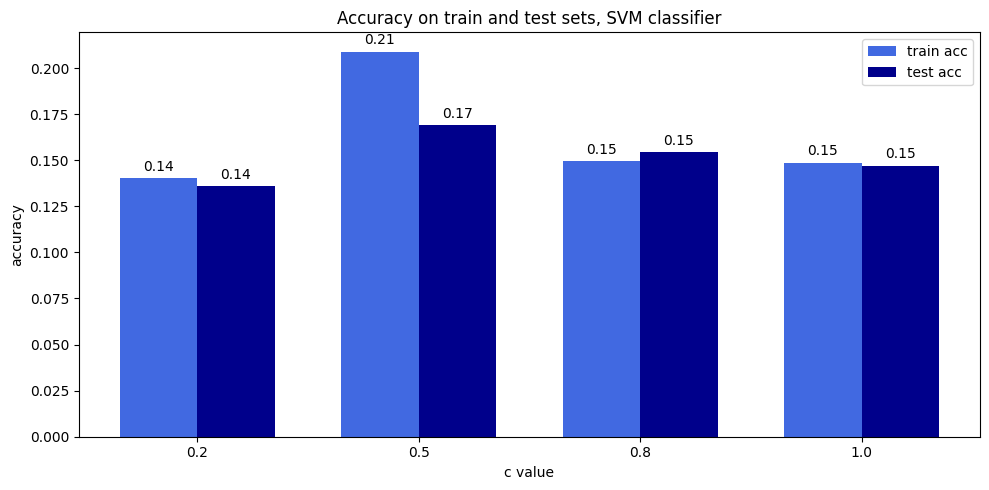

In [133]:
bar_width = 0.35
x_pos = range(len(c_vect))

fig, ax = plt.subplots(figsize=(10, 5))

train_bars = ax.bar(x_pos, acc_train_vect_svm, width=bar_width, label='train acc', color='royalblue')
test_bars = ax.bar([pos + bar_width for pos in x_pos], acc_test_vect_svm, width=bar_width, label='test acc', color='darkblue')

ax.set_xticks([pos + bar_width / 2 for pos in x_pos])
ax.set_xticklabels(c_vect)

ax.set_xlabel('c value')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy on train and test sets, SVM classifier')
ax.legend()

# function to add text labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

# add labels on top of the bars
add_labels(train_bars)
add_labels(test_bars)

plt.tight_layout()
plt.show()


### Multi Layer Perceptron (MLP) using Keras Sequential Model

##### Preparing the data

In [7]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [14]:
y_train.shape

(1096, 10)

In [17]:
x_train_s = X_train.astype('float32')
x_test_s = X_test.astype('float32')
x_train_s /= 255
x_test_s /= 255

# # break training set into training and validation sets
# break training set into training and validation sets
(x_train_s, x_valid_s) = x_train_s[80:], x_train_s[:80]
(y_train_s, y_valid_s) = y_train[80:], y_train[:80]

# print shape of training set
print('x_train shape:', x_train_s.shape)

# print number of training, validation, and test images
print(x_train_s.shape[0], 'train samples')
print(x_test_s.shape[0], 'test samples')
print(x_valid_s.shape[0], 'validation samples')

x_train shape: (1016, 300, 400, 3)
1016 train samples
272 test samples
80 validation samples


In [9]:
y_train.shape

(1096, 10)

##### Building and training the MLP

In [10]:
# model architecture
model = Sequential()
model.add(Flatten(input_shape = x_train_s.shape[1:]))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 360000)            0         
                                                                 
 dense (Dense)               (None, 150)               54000150  
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 54016260 (206.06 MB)
Trainable params: 540

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

In [18]:
mlp_start = time.time()

checkpointer = ModelCheckpoint(filepath='MLP.best_weights.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train_s, y_train_s, batch_size=32, epochs=30,
          validation_data=(x_valid_s, y_valid_s), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

mlp_end = time.time()
mlp_took = mlp_end -mlp_start
print("took %s seconds"%(mlp_took))

Epoch 1/30

Epoch 1: val_loss improved from inf to 3.71174, saving model to MLP.best_weights.hdf5
32/32 - 36s - loss: 1.2877 - accuracy: 0.5699 - val_loss: 3.7117 - val_accuracy: 0.0000e+00 - 36s/epoch - 1s/step
Epoch 2/30

Epoch 2: val_loss improved from 3.71174 to 2.75444, saving model to MLP.best_weights.hdf5
32/32 - 26s - loss: 1.1869 - accuracy: 0.5945 - val_loss: 2.7544 - val_accuracy: 0.0300 - 26s/epoch - 820ms/step
Epoch 3/30

Epoch 3: val_loss improved from 2.75444 to 2.09352, saving model to MLP.best_weights.hdf5
32/32 - 31s - loss: 1.1141 - accuracy: 0.6270 - val_loss: 2.0935 - val_accuracy: 0.0800 - 31s/epoch - 969ms/step
Epoch 4/30

Epoch 4: val_loss improved from 2.09352 to 1.94210, saving model to MLP.best_weights.hdf5
32/32 - 39s - loss: 1.0652 - accuracy: 0.6476 - val_loss: 1.9421 - val_accuracy: 0.3000 - 39s/epoch - 1s/step
Epoch 5/30

Epoch 5: val_loss did not improve from 1.94210
32/32 - 31s - loss: 0.9930 - accuracy: 0.6860 - val_loss: 2.5517 - val_accuracy: 0.1000

In [19]:
# load the weights that yielded the best validation accuracy
model.load_weights('MLP.best_weights.hdf5')
#Predict and Evaluate
y_test_pred_mlp = model.predict(x_test_s)
y_test_pred_mlp = np.argmax (y_test_pred_mlp, axis = 1)
y_test= np.argmax(y_test, axis=1)


y_train_pred_mlp = model.predict(x_train_s)
y_train_pred_mlp = np.argmax (y_train_pred_mlp, axis = 1)
y_train=np.argmax(y_train, axis=1)

32/32 [==============================] - 6s 157ms/step


In [20]:
def evaluate_mlp(y_train_pred, y_test_pred,y_train  = y_train[80:]):
    # accuracy
    print("#"*40)
    print("Accuracy on train: ", accuracy_score(y_true=y_train, y_pred=y_train_pred))
    print("Accuracy on test: ", accuracy_score(y_true=y_test, y_pred=y_test_pred))
    # recall
    print("#"*40)
    print("Recall on train: ", recall_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Recall on test: ", recall_score(y_true=y_test, y_pred=y_test_pred, average = 'macro'))
    # precision
    print("#"*40)
    print("Precision on train: ", precision_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Precision on test: ", precision_score(y_true=y_test, y_pred=y_test_pred, average='macro'))

    # plot confusion matrices
    print("#"*40)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    c_1 = confusion_matrix(y_true=y_train, y_pred=y_train_pred)
    if (len(np.unique(y_train_pred))==10):
        cmd_1 = ConfusionMatrixDisplay(c_1, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    else:
        cmd_1 = ConfusionMatrixDisplay(c_1, display_labels=['not classified', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    cmd_1.plot(ax=ax[0], cmap=plt.cm.Blues)
    ax[0].set_title("Confusion matrix: train data")

    c_2 = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
    if (len(np.unique(y_test_pred))==10):
        cmd_2 = ConfusionMatrixDisplay(c_2, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    else:
        cmd_2 = ConfusionMatrixDisplay(c_2, display_labels=['not classified', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    cmd_2.plot(ax=ax[1], cmap=plt.cm.Blues)
    ax[1].set_title("Confusion matrix: test data")
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

    plt.show()

########################################
Accuracy on train:  0.8523622047244095
Accuracy on test:  0.49264705882352944
########################################
Recall on train:  0.8475180009945097
Recall on test:  0.49000407000407
########################################
Precision on train:  0.8695848554274193
Precision on test:  0.4994773260328329
########################################


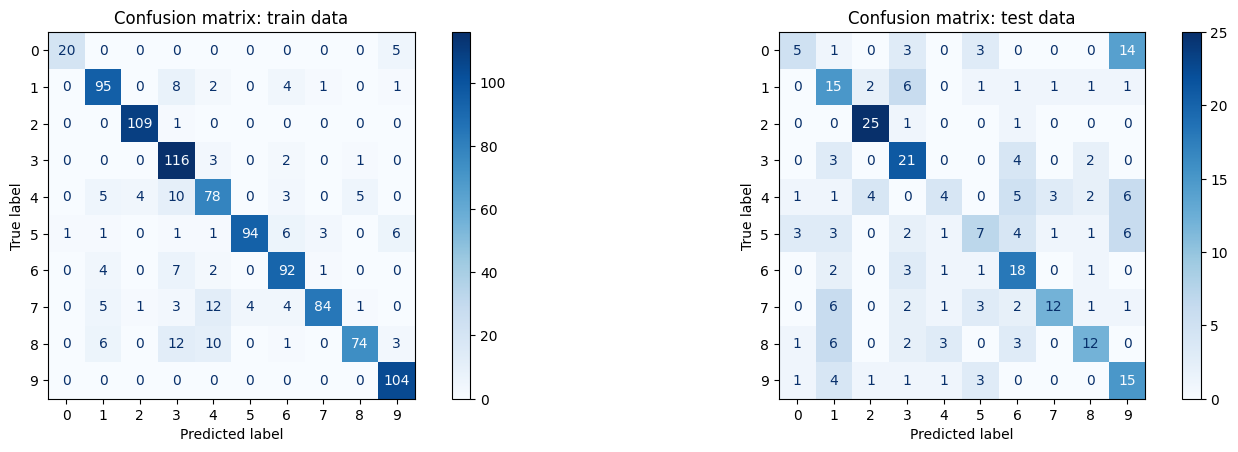

In [22]:
evaluate_mlp(y_train_pred_mlp, y_test_pred_mlp)

#### MLP using histograms of visual words as features
no_clusters = 10

In [ ]:
with open('mega_histogram_train_10_monkey.txt', 'rb') as f:
    mega_histogram = np.load(f)
kmeans_obj = joblib.load('kmeans_model_10_monkey.pkl')
no_clusters = kmeans_obj.n_clusters

In [ ]:
# data preparation
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train_s = mega_histogram # vw histograms of all training images

# break training set into training and validation sets
(x_train_s, x_valid_s) = x_train_s[80:], x_train_s[:80]
(y_train_s, y_valid_s) = y_train[80:], y_train[:80]

# print shape of training set
print('x_train shape:', x_train_s.shape)

# print number of training, validation, and test images
print(x_train_s.shape[0], 'train samples')
print(x_test_s.shape[0], 'test samples')
print(x_valid_s.shape[0], 'validation samples')

##### Building and training the MLP

In [ ]:
# model architecture
model = Sequential()
model.add(Flatten(input_shape = x_train_s.shape[1:]))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

In [ ]:
mlp_start = time.time() # for stopwatch

checkpointer = ModelCheckpoint(filepath='MLP.best_weights.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train_s, y_train_s, batch_size=32, epochs=30,
          validation_data=(x_valid_s, y_valid_s), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

mlp_end = time.time()
mlp_took = mlp_end - mlp_start
print("took %s seconds"%(mlp_took))

In [ ]:
def recognize_mlp(model, kmeans_obj, test_img):
    sift = cv2.SIFT_create()
    img_keypoints, img_desc = sift.detectAndCompute(test_img, None)
    no_clusters = kmeans_obj.n_clusters
    vocab = np.array( [[ 0 for i in range(no_clusters)]])
    if img_desc is not None:
        test_ret = kmeans_obj.predict(img_desc)
        for each in test_ret:
            vocab[0][each] +=1
        lb = model.predict(vocab)
        lb = np.argmax(lb) # 1st difference in comparison to previously used fcn
        return lb
    else:
        lb = -1000 # had to change this too
        return lb

def test_model_mlp(model, kmeans_obj, x_test):
    predictions = []
    start_time = time.time()
    print ("Testing started ..")
    for image in x_test:
        cl = recognize_mlp(model, kmeans_obj, image)
        predictions.append(cl)
    print ("Testing completed")
    print ("Time taken in testing - {0}".format((time.time() - start_time)))
    return np.array(predictions)

def test_model_train_set_mlp(model, mega_histogram): 
    # there is no need to test the training set in the same way as test (mega_histogram is saved)
    start_time = time.time()
    print ("Testing started ..")
    predictions = model.predict(mega_histogram)
    predictions = np.argmax(predictions, axis=1)  # 2nd difference in comparison to previously used fcn
    print ("Testing completed")
    print ("Time taken in testing - {0}".format((time.time() - start_time)))
    return np.array(predictions)

In [ ]:
# predict and evaluate
y_test_pred_mlp = test_model_mlp(model, kmeans_obj, X_test)
y_test = np.argmax(y_test, axis=1) # scalar: back from 1-hot-encoded value

y_train_pred_mlp = test_model_train_set_mlp(model, mega_histogram)
y_train = np.argmax(y_train, axis=1) # scalar: back from 1-hot-encoded value


In [ ]:
evaluate_mlp(y_train_pred_mlp[80:], y_test_pred_mlp)